In [4]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [5]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/German_data/cl19340rcch006/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [6]:
data = np.load(loc_P04+'cl19340rcch006.npy')

In [7]:
# cropped_data = []
# for k in data:
#     cropped_data.append(k[270:950, 290:720])

In [8]:
# cropped_data[0].shape

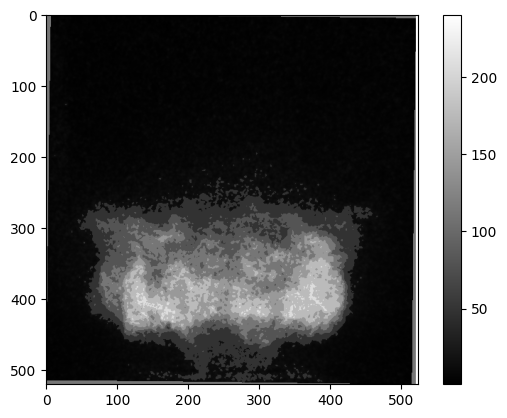

In [9]:
peg = plt.imshow(data[200], cmap='gray')
plt.colorbar(peg)

In [10]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(data[i], (9, 9), 9))
patches = np.array(patches)

In [11]:
patches.shape

(8192, 57, 58, 9, 9)

In [12]:
%who

data	 i	 loc_P04	 np	 patches	 patchify	 peg	 plt	 


In [13]:
mean = np.zeros(patches.shape[:3])
# median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [14]:
mean.shape

(8192, 57, 58)

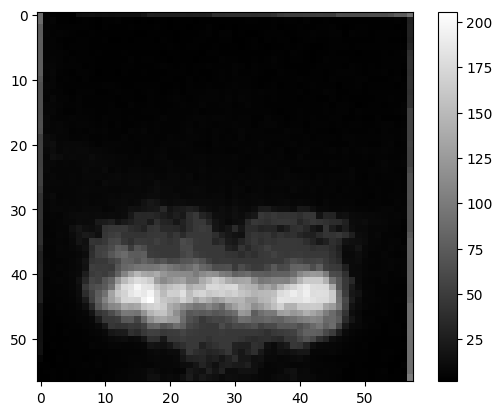

In [15]:
neg = plt.imshow(np.array(mean[100]), cmap='gray')
plt.colorbar(neg)

In [16]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

33.59635495847851


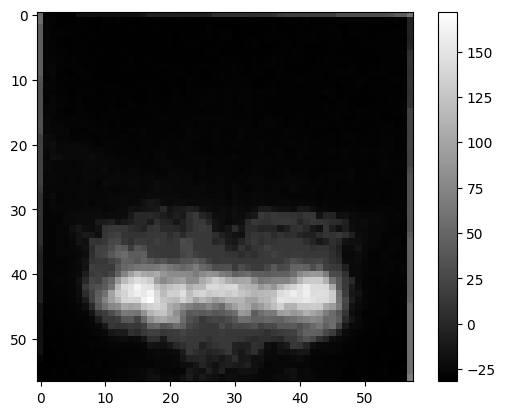

In [17]:
neg = plt.imshow(np.array(mean_adj[100]), cmap='gray')
plt.colorbar(neg)

In [18]:
from scipy.fft import fft, fftfreq
fft_sig_mean = np.zeros_like(mean).astype(np.complex64)
# fft_sig_median = np.zeros_like(median).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig_mean[:, i, j] = fft(mean_adj[:, i, j])
            # fft_sig_median[:, i, j] = fft(median[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])

In [19]:
fft_sig_mean[0,:].shape

(57, 58)

In [20]:
n = fft_sig_mean.shape[0]  # Number of data points
sampling_rate = 10 * 1000 # Adjust this if your data is sampled differently
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

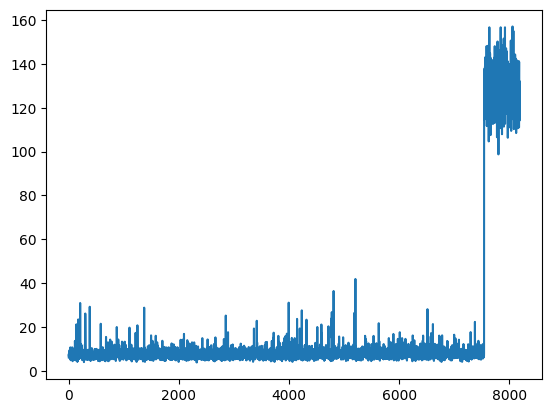

In [21]:
plt.plot(mean[: ,55,20])
# plt.xlim([0,1000])

In [22]:
frequencies.shape

(8192,)

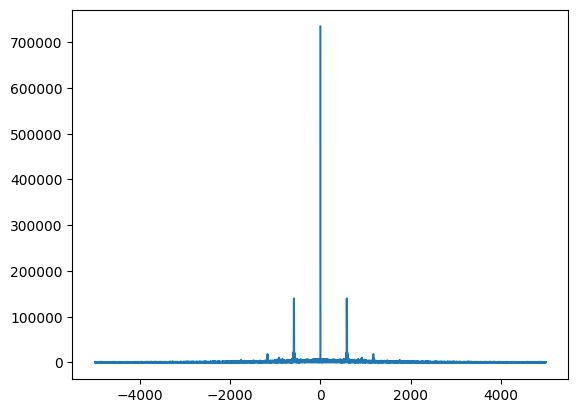

In [23]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
# plt.xlim([0,sampling_rate/2])

In [24]:
np.absolute(fft_sig_mean[: ,44,40]).shape

(8192,)

In [25]:
# np.absolute(fft_filter_1000[100:int(frequencies.shape[0]/2)]).shape

(0.0, 5000.0)

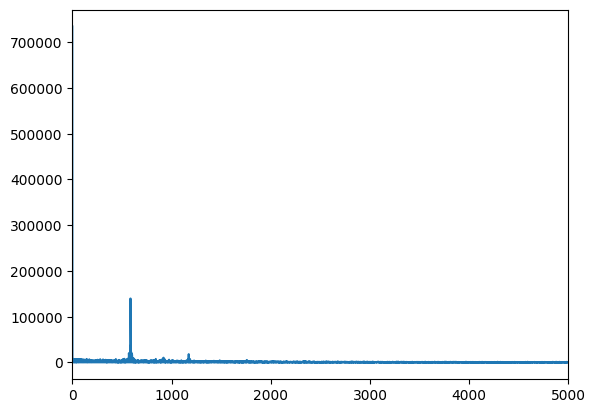

In [26]:
plt.plot(frequencies, np.absolute(fft_sig_mean[: ,44,40]))
plt.xlim([0,sampling_rate/2])

(0.0, 5000.0)

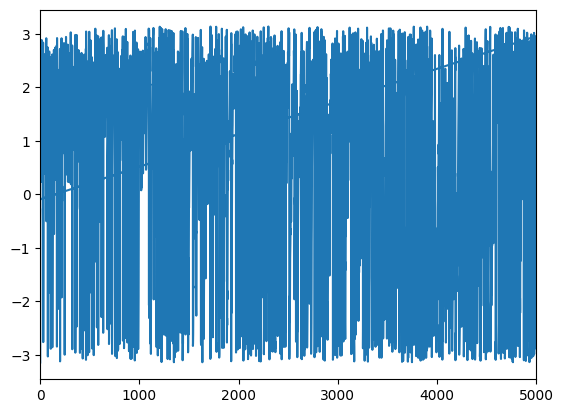

In [27]:
plt.plot(frequencies,np.angle(fft_sig_mean[:,25,33]))
plt.xlim([0,sampling_rate/2])

In [28]:
fft_ravel = np.reshape(fft_sig_mean, [8192, fft_sig_mean.shape[1]*fft_sig_mean.shape[2]])

In [29]:
abs(fft_ravel).max()

832116.4

### scalegram

In [30]:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128
 
def anime(x, sig):
    fig, ax = plt.subplots(1, 1)
    # fig.set_size_inches(5,5)
    
    def animate(i):
        ax.clear()
        # Get the point from the points list at index i
        point = abs(sig[:,i])
        # Plot that point using the x and y coordinates
        ax.plot(x, point, 
                label='original',)
        ax.set_title('Pixel = {0:4d} and its FFT plot'.format(i))
        # Set the x and y axis to display a fixed rangeFrame
        ax.set_xlabel("Freq")
        ax.set_ylabel("abs(FFT)")
        ax.set_xlim([0, sampling_rate/2])
        # ax.set_ylim([0, 5000])
        # ax.set_ylim([0, 1])
    ani = FuncAnimation(fig, animate, frames=sig.shape[1], interval=500, repeat=True)
    plt.close()
    display(HTML(ani.to_jshtml()))

In [31]:
fft_filter_1000 = np.zeros_like(fft_ravel)

for i in range(fft_ravel.shape[1]):
      for k in range(fft_ravel.shape[0]):
        if (abs(fft_ravel[k][i]<10000)):
            fft_filter_1000[k][i] = 0
        else:
            fft_filter_1000[k][i] = fft_ravel[k][i]

In [32]:
fft_filter_1000.shape

(8192, 3306)

In [33]:
# anime(frequencies, fft_filter_1000)

In [34]:
# anime(frequencies, fft_ravel)

In [35]:
# plt.plot(frequencies[abs(fft_filter_1000[:, 2689]))

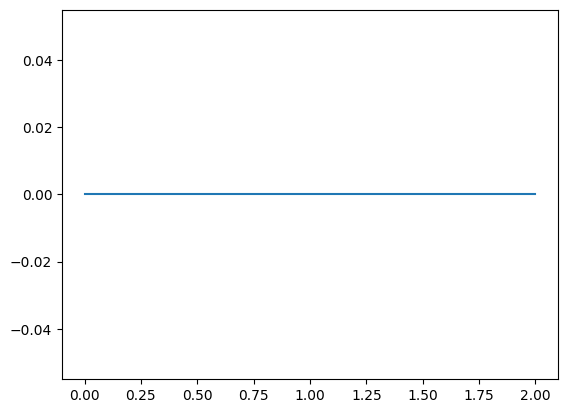

In [36]:
plt.plot(abs(fft_filter_1000[:, 2689])[606:609])

In [37]:
#To save the FFT plots

def fft_plots(loc, name, sig):
    for i in range(sig.shape[1]):
        plt.plot(frequencies, abs(sig[:, i]))
        plt.title('Pixel = {0:4d} and its FFT plot'.format(i))
    # Set the x and y axis to display a fixed rangeFrame
        plt.xlabel("Freq")
        plt.ylabel("abs(FFT)")
        plt.xlim([0, sampling_rate/2])
        plt.ylim([0, 5000])
        exec(f'plt.savefig(loc+name+str({i}))')
        plt.show()

In [38]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/1000_filter/'
# name = 'pixel_FFT_1000_'
# fft_plots(loc,name, fft_filter_1000)

In [39]:
# loc = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/FTT_images/No_filter/'
# name = 'Pixel_FFT_noFilter_'
# fft_plots(loc,name, fft_ravel)

In [40]:
# from matplotlib.animation import FFMpegWriter
# # Save the animation as an animated GIF
# f = 'FFT_demonstration.mp4'
# writer = FFMpegWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
# ani.save(f, writer=writer)

In [41]:
fft_filter_1000[0:int(frequencies.shape[0]/2)].shape

(4096, 3306)

In [42]:
freq_pre = np.zeros_like(fft_filter_1000, dtype=np.float32)
for i in range(fft_filter_1000.shape[0]):
    for j in range(fft_filter_1000.shape[1]):
        if fft_filter_1000[i][j] == 0:
            freq_pre[i][j] = 0
        else:
            freq_pre[i][j] = frequencies[i]

In [ ]:
freq_pre.shape

(8192, 3306)

In [ ]:
# Creating a tensor of values for bar graph plotting
def ten_val(x_data):
    x_data_ten = []
    for i in range(x_data.shape[0]):
        k = []
        for j in range(x_data.shape[1]):
            if x_data[i][j] != 0:
                k.append(x_data[i][j])
        x_data_ten.append(k)
    return x_data_ten

In [ ]:
# Preparing data for the 3D plotting 

x_data = freq_pre[0:int(freq_pre.shape[0]/2)].astype(np.int32)
y_data = np.absolute(fft_filter_1000[0:int(freq_pre.shape[0]/2),:]).astype(np.int32)

print(x_data.shape, y_data.shape)

(4096, 3306) (4096, 3306)


In [ ]:
# freq_pre[:freq_pre.shape[0]/2].shape

In [ ]:
for i in range(x_data.shape[0]):
    for j in range(x_data.shape[1]):
        if x_data[i][j] == 0:
            y_data[i][j] = 0

In [ ]:
x_data_sort = np.zeros_like(x_data)
y_data_sort = np.zeros_like(y_data)

In [ ]:
for i in range(x_data.shape[1]):
    idx = np.argsort(y_data[:,i])
    x_data_sort[:, i] = x_data[:, i][idx]
    y_data_sort[:, i] = y_data[:, i][idx]

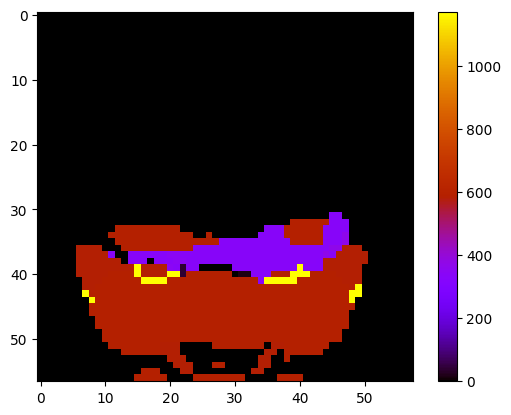

In [ ]:
peg = plt.imshow(x_data_sort[-1, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)
# plt.imsave(peg)

(0.0, 10.0)

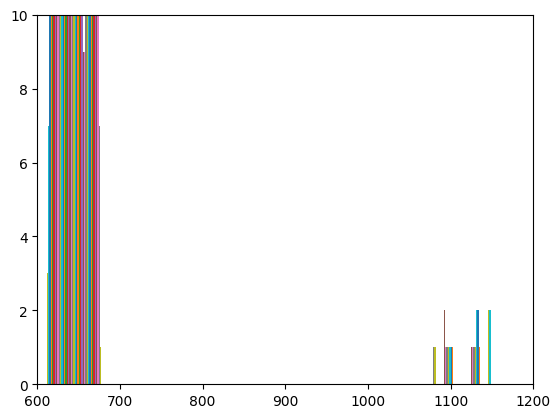

In [ ]:
plt.hist(x_data_sort[-1, :].reshape(fft_sig_mean[0,:].shape))
plt.xlim(xmin=600, xmax=1200)
plt.ylim(ymin=0, ymax=10)

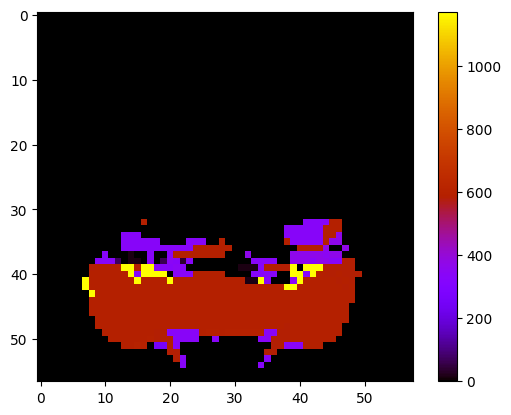

In [ ]:
peg = plt.imshow(x_data_sort[-2, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

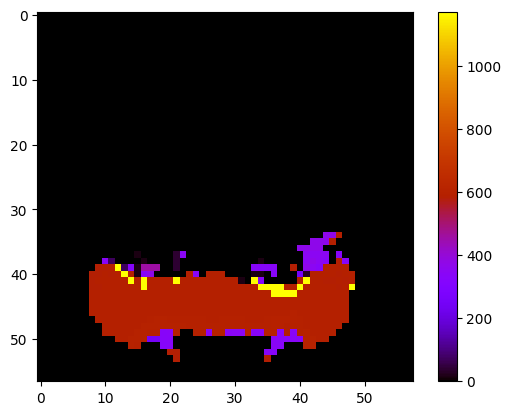

In [ ]:
peg = plt.imshow(x_data_sort[-3, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

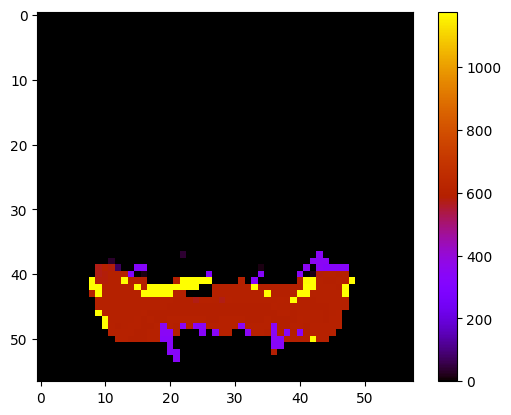

In [ ]:
peg = plt.imshow(x_data_sort[-4, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

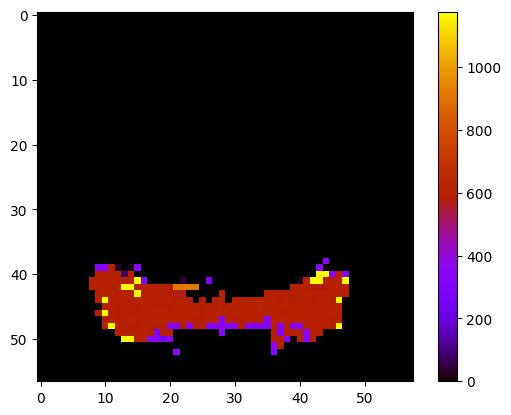

In [ ]:
peg = plt.imshow(x_data_sort[-5, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

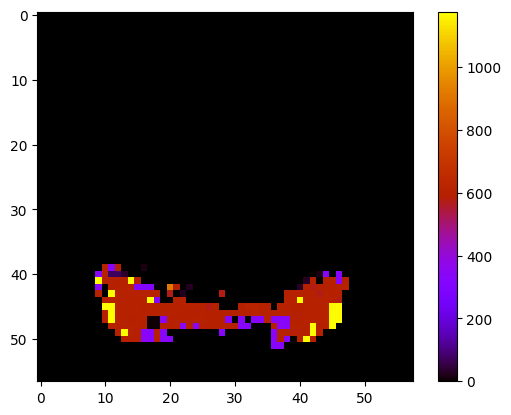

In [ ]:
peg = plt.imshow(x_data_sort[-6, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

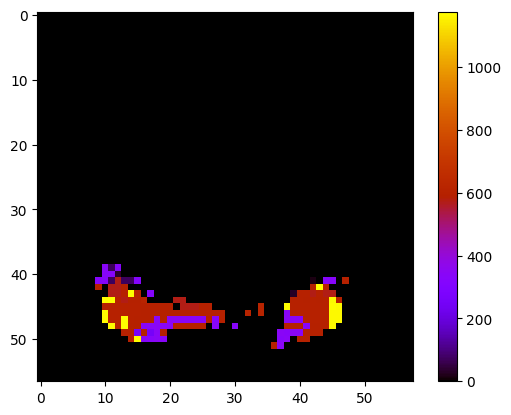

In [ ]:
peg = plt.imshow(x_data_sort[-7, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

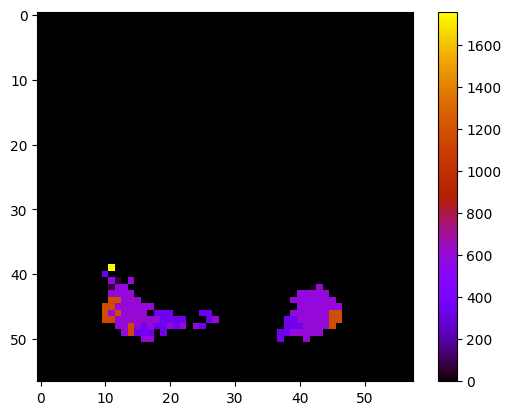

In [ ]:
peg = plt.imshow(x_data_sort[-8, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

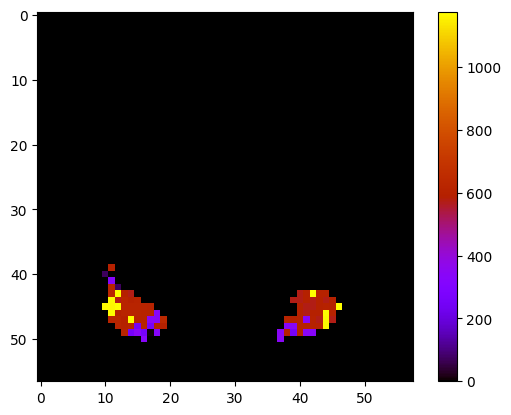

In [ ]:
peg = plt.imshow(x_data_sort[-9, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

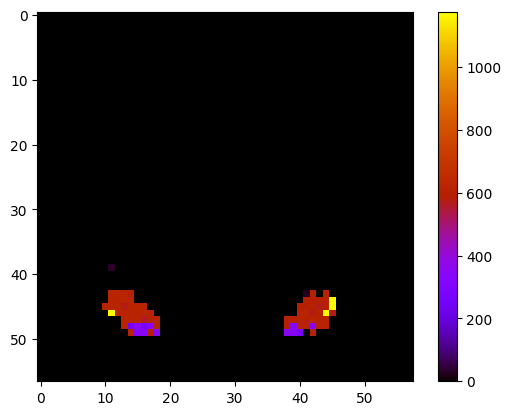

In [ ]:
peg = plt.imshow(x_data_sort[-10, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

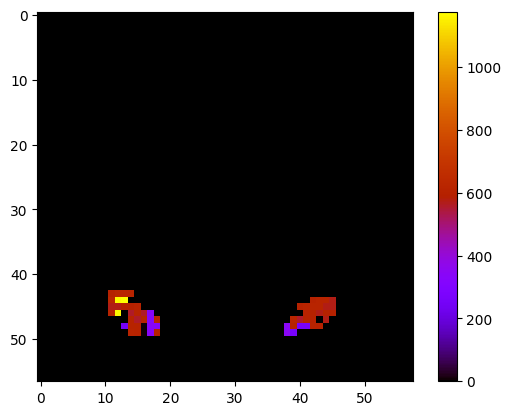

In [ ]:
peg = plt.imshow(x_data_sort[-11, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

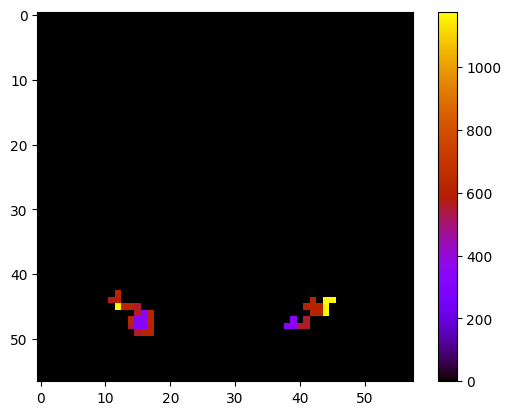

In [ ]:
peg = plt.imshow(x_data_sort[-12, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

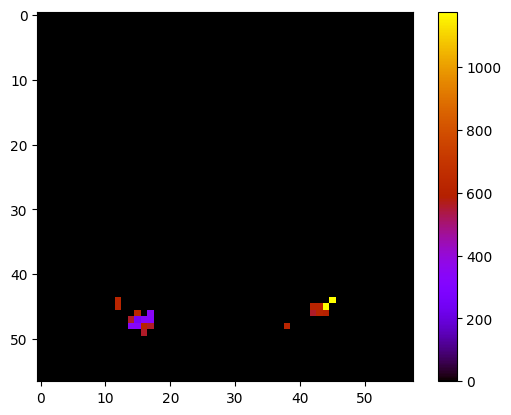

In [ ]:
peg = plt.imshow(x_data_sort[-13, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

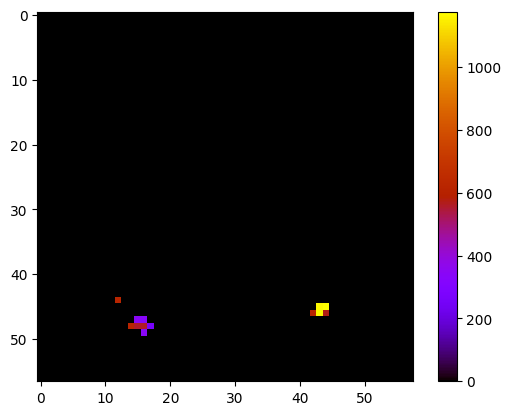

In [ ]:
peg = plt.imshow(x_data_sort[-14, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

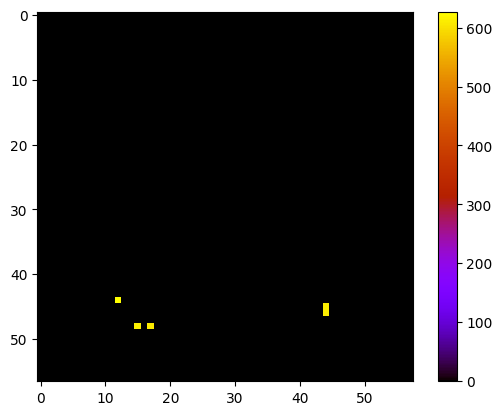

In [ ]:
peg = plt.imshow(x_data_sort[-15, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

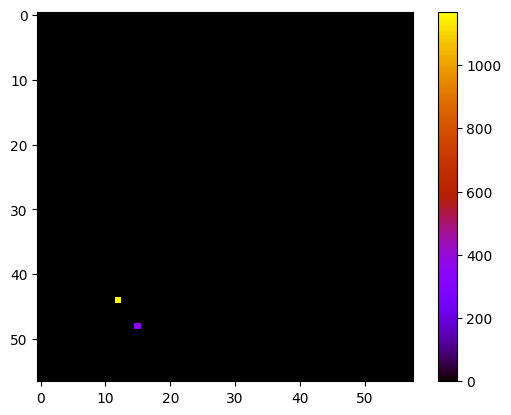

In [ ]:
peg = plt.imshow(x_data_sort[-16, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

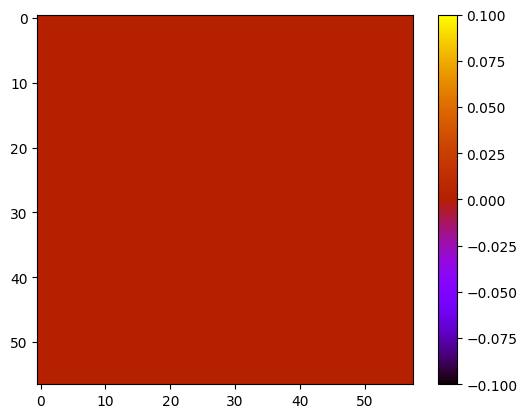

In [ ]:
peg = plt.imshow(x_data_sort[-17, :].reshape(fft_sig_mean[0,:].shape), cmap="gnuplot")
plt.colorbar(peg)

In [ ]:
# np.unique(x_data_con_sort[455])

In [ ]:
# y_data_con_sort.shape

In [ ]:
y_data.max()

32995.258

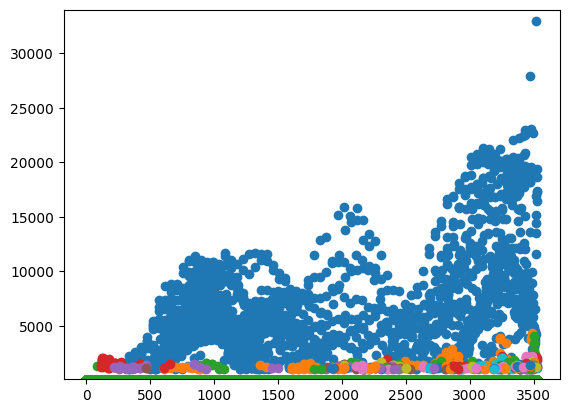

In [ ]:
fig, ax = plt.subplots(1)
for i in range(int(freq_pre.shape[0]/2)):   
    peg = ax.scatter(np.linspace(1, 3525, 3525), y_data.T[:,i])
    plt.ylim(100, 34000)
    # fig.colorbar(peg, ax)

<BarContainer object of 3525 artists>

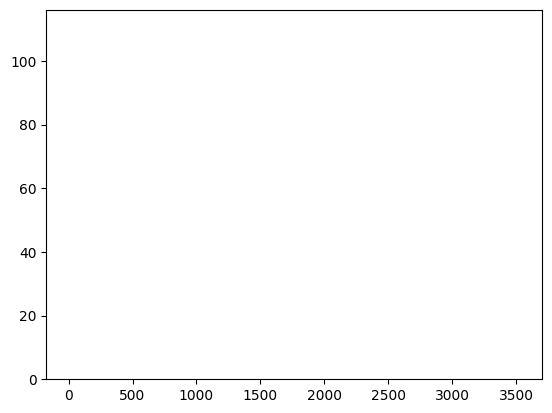

In [ ]:
plt.bar(np.linspace(1, 3525, 3525), x_data.T[:,33])

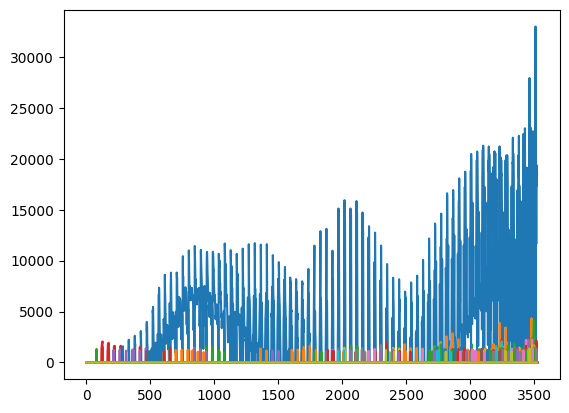

In [ ]:
plt.plot(y_data_con)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate some data
# x, y, z = np.random.random((3, 30))
# z = z * 20 + 0.1

# # Set some values in z to 0...
# z[:5] = 0

# cmap = plt.get_cmap('jet', 20)
# cmap.set_under('gray')

# fig, ax = plt.subplots()
# cax = ax.bar(x, y, cmap=cmap, vmin=0.1, vmax=z.max())
# fig.colorbar(cax, extend='min')

# plt.show()

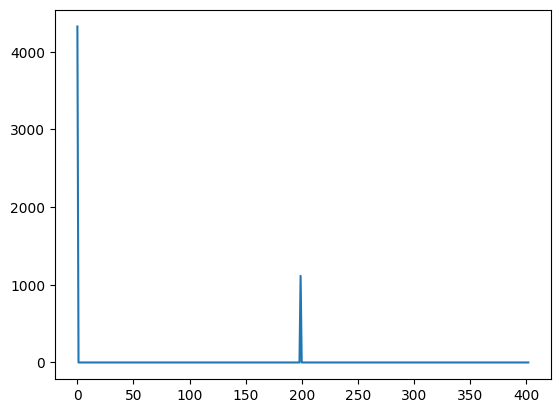

In [ ]:
plt.plot(y_data[:,2689])

In [ ]:
# freq_pre = []
# for i in range()

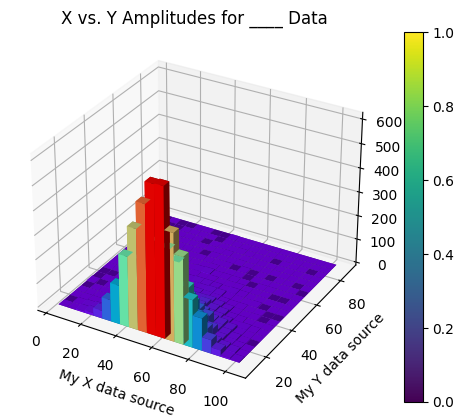

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np

xAmplitudes = np.random.exponential(10,10000) #your data here
yAmplitudes = np.random.normal(50,10,10000) #your other data here - must be same array length

x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)   #useful for regular matplotlib arrays

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data0:sampling_rate/2], 
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = mat.colormaps.get_cmap('rainbow') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

bu = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.colorbar(bu)
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.savefig("Your_title_goes_here")
plt.show()


In [ ]:
# 


In [ ]:
color = plt.get_cmap('rainbow', np.unique(x_data).shape[0])

In [ ]:
for i, c in enumerate(color):
   plt.plot(x, y, c=c)

TypeError: 'LinearSegmentedColormap' object is not iterable

In [ ]:
type(color)

matplotlib.colors.LinearSegmentedColormap